In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from scipy.stats import norm

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)

In [ ]:
class FinancialData:
    def __init__(self, tickers, start, end):
        self.tickers = tickers
        self.start = start
        self.end = end
        self.data = None
        self.returns = None

    def load(self):
        try:
            raw = yf.download(self.tickers, start=self.start, end=self.end)
        except Exception as e:
            print('Download failed:', e)
            return None
        if 'Adj Close' in raw.columns:
            df = raw['Adj Close']
        elif 'Close' in raw.columns:
            df = raw['Close']
        else:
            print("Error: couldn't find Close prices in downloaded data.")
            return None
        if isinstance(df.columns, pd.MultiIndex):
            df.columns = df.columns.get_level_values(0)
        self.data = df
        return self.data

    def preprocess(self):
        if self.data is None:
            print('No data to preprocess.')
            return
        self.data = self.data.interpolate(method='time').dropna()

    def compute_returns(self):
        if self.data is None:
            print('No data to compute returns.')
            return None
        self.returns = self.data.pct_change().dropna()
        return self.returns

    def get(self, col):
        if self.data is None:
            return None
        return self.data[col] if col in self.data.columns else None


In [ ]:
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-01-01'
end_date = '2026-01-15'

loader = FinancialData(tickers, start_date, end_date)
data = loader.load()
if data is None:
    raise SystemExit('Data load failed.')
loader.preprocess()
data = loader.data

print("Columns in 'data' are now:", data.columns.tolist())
display(data.head())

C:\Users\weldi\AppData\Local\Temp\ipykernel_8380\2677722652.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  raw_data = yf.download(tickers, start=start_date, end=end_date)
[*********************100%***********************]  3 of 3 completed

Columns in 'data' are now: ['BND', 'SPY', 'TSLA']


Ticker,BND,SPY,TSLA
Date,,,
2015-01-02,60.385998,170.589584,14.620667
2015-01-05,60.561291,167.508804,14.006000
2015-01-06,60.736649,165.931030,14.085333
2015-01-07,60.773178,167.998749,14.063333
2015-01-08,60.678215,170.979935,14.041333


In [ ]:
print("\nDescriptive Statistics:")
display(data.describe())

print("\nMissing Values:")
print(data.isnull().sum())

data = data.interpolate(method='time').dropna()

print("\nData Types:")
print(data.dtypes)


Descriptive Statistics:


Price         Close                                   High               \
Ticker          BND          SPY         TSLA          BND          SPY   
count   2775.000000  2775.000000  2775.000000  2775.000000  2775.000000   
mean      67.325729   339.074724   138.472937    67.424459   340.845875   
std        4.685294   141.925744   131.682073     4.692171   142.569517   
min       59.698639   154.980835     9.578000    59.772431   156.031787   
25%       63.436428   219.599686    17.851666    63.504373   221.038725   
50%       66.492104   301.538544    91.625999    66.634795   303.765262   
75%       71.237358   423.938477   242.028336    71.377835   425.886027   
max       76.068100   695.159973   489.880005    76.161624   696.090027   

Price                        Low                                   Open  \
Ticker         TSLA          BND          SPY         TSLA          BND   
count   2775.000000  2775.000000  2775.000000  2775.000000  2775.000000   
mean     141.534064    67.224865   337.015720   135.271181    67.328207   
std      134.616345     4.676260   141.139477   128.668762     4.685213   
min       10.331333    59.661737   152.881563     9.403333    59.728164   
25%       18.087000    63.370267   218.370042    17.588000    63.438518   
50%       94.484001    66.376225   299.861302    89.113998    66.478968   
75%      247.846664    71.094412   421.455140   236.978333    71.256971   
max      498.829987    76.034095   691.349976   485.329987    76.127625   

Price                                   Volume                              
Ticker          SPY         TSLA           BND           SPY          TSLA  
count   2775.000000  2775.000000  2.775000e+03  2.775000e+03  2.775000e+03  
mean     339.015877   138.505925  4.485148e+06  8.604954e+07  1.108480e+08  
std      141.905190   131.791350  2.918896e+06  4.386106e+07  7.145365e+07  
min      154.540111     9.488000  0.000000e+00  2.027000e+07  1.062000e+07  
25%      219.349081    17.836666  2.172700e+06  5.881420e+07  6.758150e+07  
50%      302.125017    93.066666  4.175700e+06  7.570750e+07  9.264600e+07  
75%      423.759666   242.901665  6.043050e+06  9.923995e+07  1.282366e+08  
max      695.489990   489.880005  3.396300e+07  5.072443e+08  9.140820e+08


Missing Values:
Price   Ticker
Close   BND       0
        SPY       0
        TSLA      0
High    BND       0
        SPY       0
        TSLA      0
Low     BND       0
        SPY       0
        TSLA      0
Open    BND       0
        SPY       0
        TSLA      0
Volume  BND       0
        SPY       0
        TSLA      0
dtype: int64

Data Types:
Price   Ticker
Close   BND       float64
        SPY       float64
        TSLA      float64
High    BND       float64
        SPY       float64
        TSLA      float64
Low     BND       float64
        SPY       float64
        TSLA      float64
Open    BND       float64
        SPY       float64
        TSLA      float64
Volume  BND         int64
        SPY         int64
        TSLA        int64
dtype: object


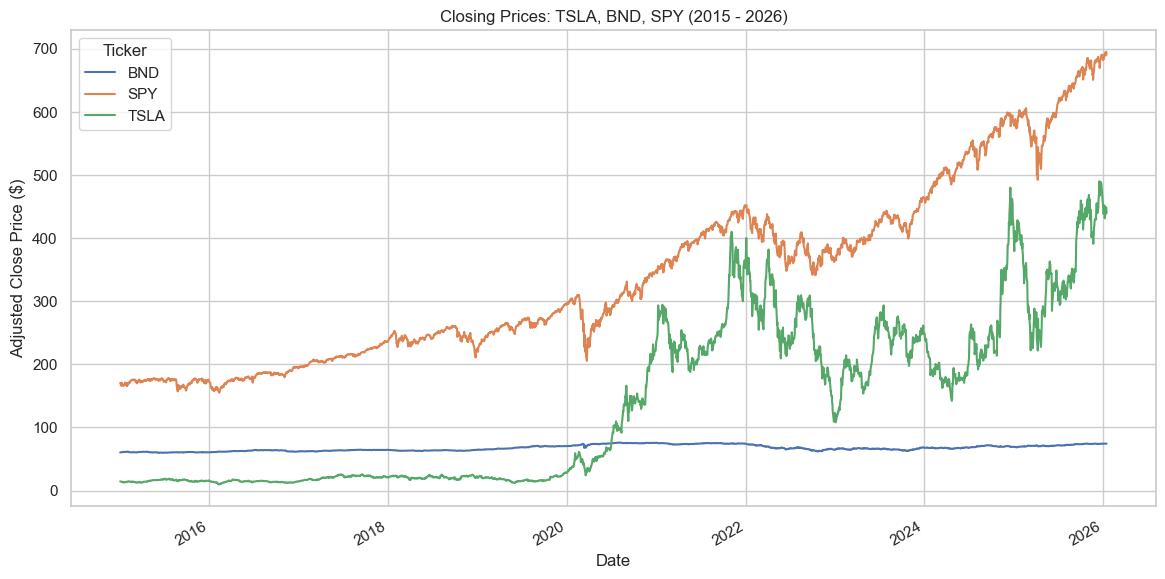

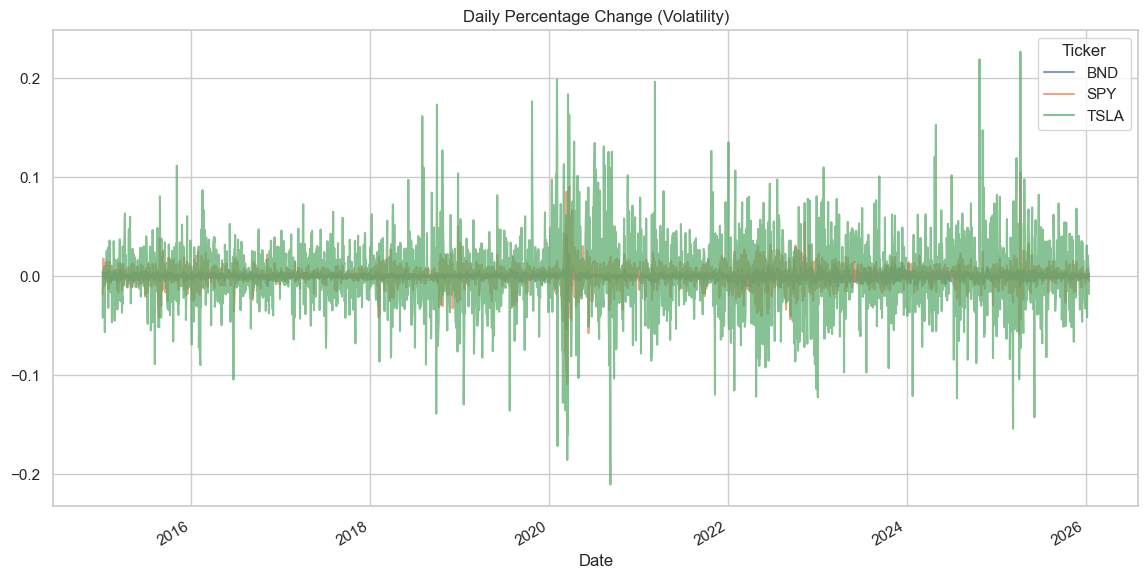

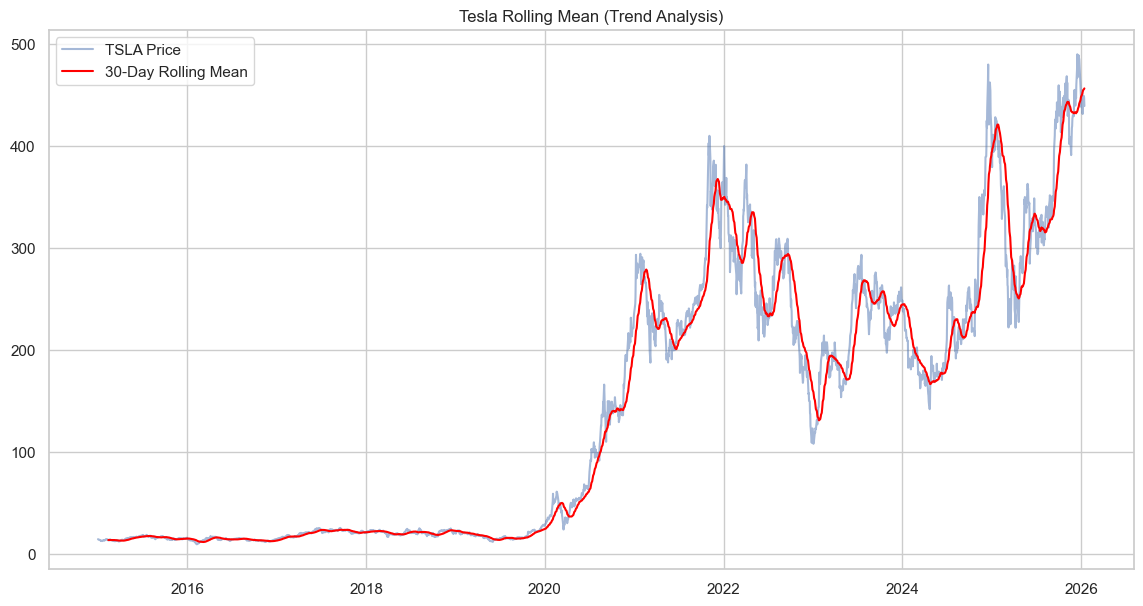


Number of significant anomalies detected in TSLA: 48


In [ ]:
data.plot()
plt.title('Closing Prices: TSLA, BND, SPY (2015 - 2026)')
plt.ylabel('Adjusted Close Price ($)')
plt.show()

returns = data.pct_change().dropna()
returns.plot(alpha=0.7)
plt.title('Daily Percentage Change (Volatility)')
plt.show()

window = 30
if 'TSLA' in data.columns:
    tsla_rolling_mean = data['TSLA'].rolling(window=window).mean()
    tsla_rolling_std = data['TSLA'].rolling(window=window).std()
    plt.plot(data['TSLA'], label='TSLA Price', alpha=0.5)
    plt.plot(tsla_rolling_mean, label=f'{window}-Day Rolling Mean', color='red')
    plt.title('Tesla Rolling Mean (Trend Analysis)')
    plt.legend()
    plt.show()
    tsla_returns = returns['TSLA']
    outliers = tsla_returns[np.abs(tsla_returns) > (3 * tsla_returns.std())]
    print(f"\nNumber of significant anomalies detected in TSLA: {len(outliers)}")
else:
    print("TSLA column not found; skipping TSLA-specific analyses.")

In [ ]:
def check_stationarity(series, name):
    result = adfuller(series)
    print(f'--- ADF Test for {name} ---')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    if result[1] <= 0.05:
        print("Result: Stationary (Reject Null Hypothesis)")
    else:
        print("Result: Non-Stationary (Fail to Reject Null Hypothesis)")

if 'TSLA' in data.columns:
    check_stationarity(data['TSLA'], "TSLA Price")
else:
    print("TSLA Price column missing; skipping ADF on prices.")

if 'TSLA' in returns.columns:
    check_stationarity(returns['TSLA'], "TSLA Daily Returns")
else:
    print("TSLA returns missing; skipping ADF on returns.")

--- ADF Test for TSLA Price ---
ADF Statistic: -0.7801569882105652
p-value: 0.8248814297221106
Result: Non-Stationary (Fail to Reject Null Hypothesis)
--- ADF Test for TSLA Daily Returns ---
ADF Statistic: -53.0196185442436
p-value: 0.0
Result: Stationary (Reject Null Hypothesis)


In [ ]:
var_95 = returns.quantile(0.05)
print("\nValue at Risk (95%):")
print(var_95)

sharpe_ratio = (returns.mean() / returns.std()) * np.sqrt(252)
print("\nAnnualized Sharpe Ratio:")
print(sharpe_ratio)


Value at Risk (95%):
Ticker
BND    -0.004796
SPY    -0.016719
TSLA   -0.052529
Name: 0.05, dtype: float64

Annualized Sharpe Ratio:
Ticker
BND     0.381459
SPY     0.803992
TSLA    0.823185
dtype: float64


In [28]:
data.to_csv("../data/processed/financial_data_clean.csv")


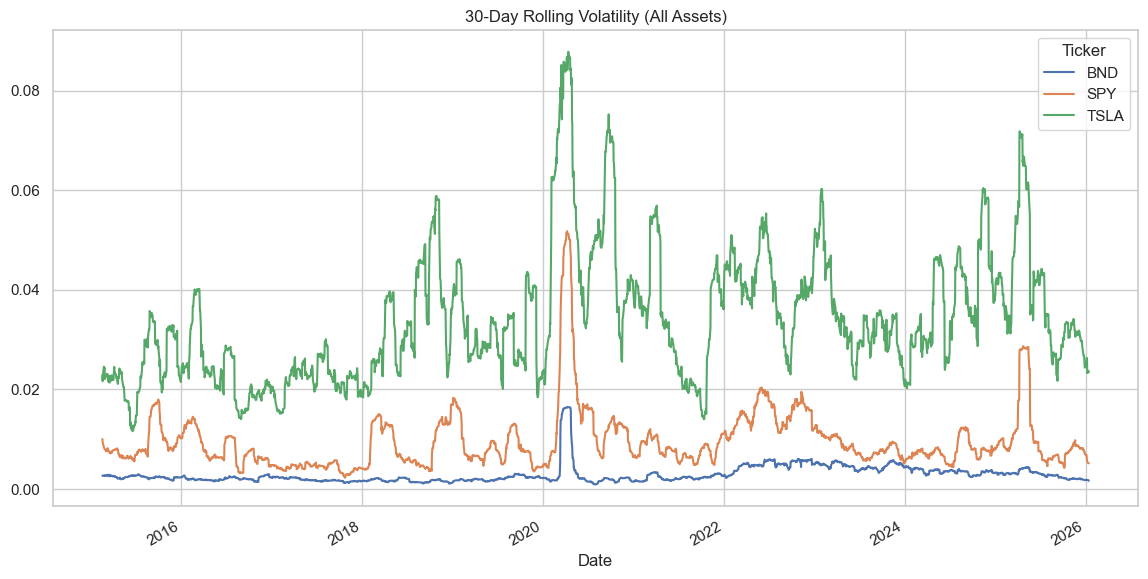

In [29]:
rolling_std_all = returns.rolling(window=30).std()

rolling_std_all.plot()
plt.title("30-Day Rolling Volatility (All Assets)")
plt.show()


In [30]:
# Top 5 highest returns for TSLA
top_high = returns['TSLA'].nlargest(5)
print("Top 5 highest TSLA returns:")
print(top_high)

# Top 5 lowest returns for TSLA
top_low = returns['TSLA'].nsmallest(5)
print("\nTop 5 lowest TSLA returns:")
print(top_low)


Top 5 highest TSLA returns:
Date
2025-04-09    0.226900
2024-10-24    0.219190
2020-02-03    0.198949
2021-03-09    0.196412
2020-03-19    0.183877
Name: TSLA, dtype: float64

Top 5 lowest TSLA returns:
Date
2020-09-08   -0.210628
2020-03-16   -0.185778
2020-02-05   -0.171758
2020-03-18   -0.160344
2025-03-10   -0.154262
Name: TSLA, dtype: float64
